# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

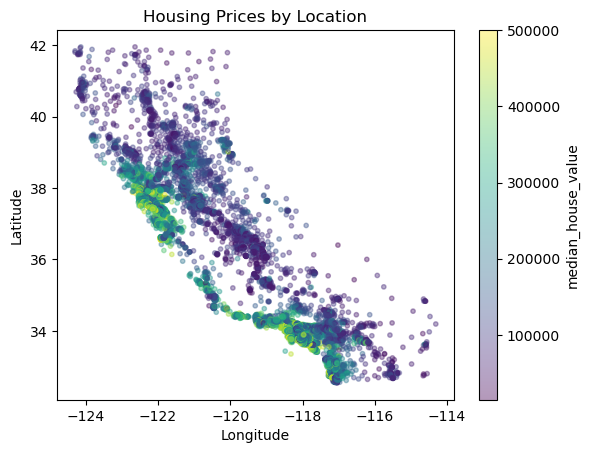

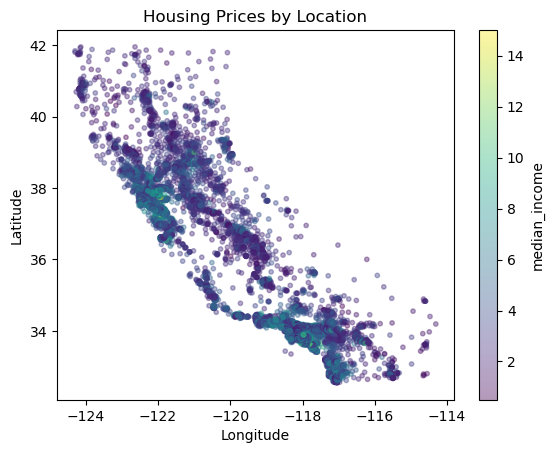

In [3]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import map

def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )

map.mapping("median_house_value")
map.mapping("median_income")

Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [1]:
%run parse_data.ipynbblock=Trueblock=True

df.describe()


,median_house_value,longitude,latitude,housing_median_age,rooms,bedrooms,population,households,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671
std,115395.615874,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822
min,14999.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,119600.000000,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400
50%,179700.000000,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800
75%,264725.000000,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250
max,500001.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [3]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [4]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    df_central = df.apply(lambda x: central(x), axis=0)
    round_dict = {'quality': 3, 'acidity': 3, 'density': 6, 'sugar': 3}
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,quality,acidity,density,sugar
mean,5.636,0.528,0.996747,2.539
median,6.000,0.520,0.996750,2.200
mode,5.000,0.600,0.997200,2.000


<br>

Let's repeat for a dispersion table:

</br>

In [5]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict            = {'quality': 3, 'acidity': 3, 'density': 6, 'sugar': 3}
    df_dispersion         = df.apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,quality,acidity,density,sugar
st.dev.,0.807,0.179,0.001887,1.409
min,3.000,0.120,0.990070,0.900
max,8.000,1.580,1.003690,15.500
range,5.000,1.460,0.013620,14.600
25th,5.000,0.390,0.995600,1.900
75th,6.000,0.640,0.997835,2.600
IQR,1.000,0.250,0.002235,0.700


Let's save the variables in easier-to-use variable names:

In [6]:
y    = df['quality']
acid = df['acidity']
dens = df['density']
sugr = df['sugar']

Let's create scatterplots for the DV (quality) vs. each of the three IVs (acid, density, sugar):

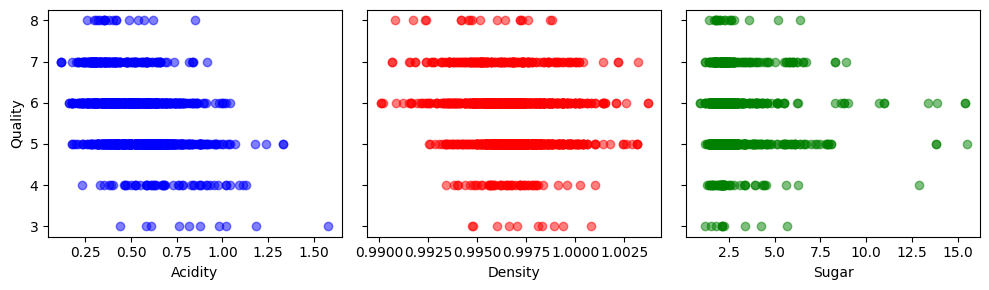

In [7]:

fig,axs = plt.subplots( 1, 3, figsize=(10,3), tight_layout=True )
axs[0].scatter( acid, y, alpha=0.5, color='b' )
axs[1].scatter( dens, y, alpha=0.5, color='r' )
axs[2].scatter( sugr, y, alpha=0.5, color='g' )

xlabels = 'Acidity', 'Density', 'Sugar' 
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('Quality')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

The density xtick values are difficult to reach so let's make them easier to read:

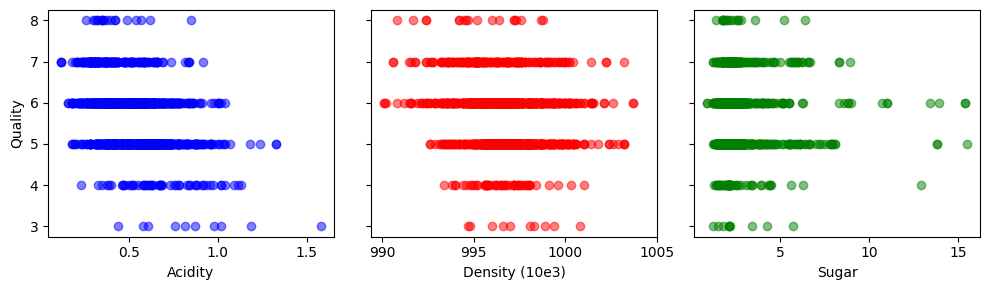

In [8]:
dens1 = np.around(1000*dens, 1)  # transformed density value

fig,axs = plt.subplots( 1, 3, figsize=(10,3), tight_layout=True )
axs[0].scatter( acid, y, alpha=0.5, color='b' )
axs[1].scatter( dens1 , y, alpha=0.5, color='r' )
axs[2].scatter( sugr, y, alpha=0.5, color='g' )

xlabels = 'Acidity', 'Density (10e3)', 'Sugar' 
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[1].set_xticks([990, 995, 1000, 1005])
axs[0].set_ylabel('Quality')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [9]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


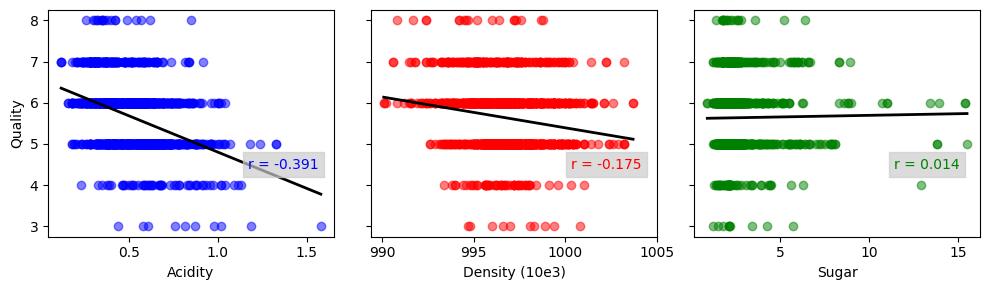

In [10]:
    
fig,axs = plt.subplots( 1, 3, figsize=(10,3), tight_layout=True )
ivs     = [acid, dens1, sugr]
colors  = 'b', 'r', 'g'
for ax,x,c in zip(axs, ivs, colors):
    ax.scatter( x, y, alpha=0.5, color=c )
    plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
    r   = corrcoeff(x, y)
    ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

xlabels = 'Acidity', 'Density (10e3)', 'Sugar' 
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[1].set_xticks([990, 995, 1000, 1005])
axs[0].set_ylabel('Quality')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

The correlation coefficients are all relatively low, suggesting no clear linear correlation between the DV and IVs.

However, in the sugar data (right panel above) it appears that there may be opposite trends for low-quality wines (quality <= 5) and high-quality wines (quality > 5).  Let's plot quality vs. sugar separately for the low- and high-quality groups, along with linear regression trends.

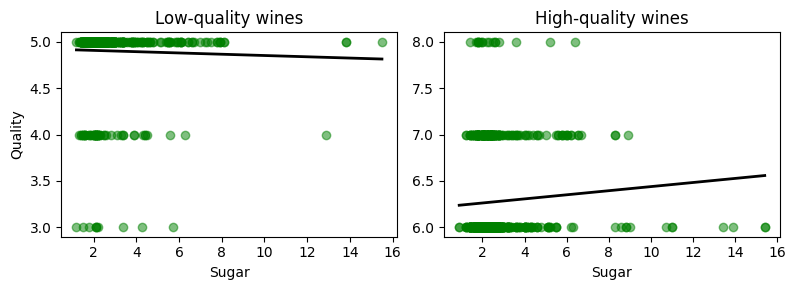

In [11]:
i_low     = y <= 5
i_high    = y > 5

fig,axs = plt.subplots( 1, 2, figsize=(8,3), tight_layout=True )
i       = [sugr]
for ax,i in zip(axs, [i_low, i_high]):
    ax.scatter( sugr[i], y[i], alpha=0.5, color='g' )
    plot_regression_line(ax, sugr[i], y[i], color='k', ls='-', lw=2)
[ax.set_xlabel('Sugar')  for ax in axs] 
axs[0].set_title('Low-quality wines')
axs[0].set_ylabel('Quality')
axs[1].set_title('High-quality wines')
plt.show()

The linear trend lines in the figures above appear to be opposite to the visual patterns:

- Quality appears to increase with sugar in low-quality wines
- Quality appears to descrease with sugar in low-quality wines

Linear regression suggests that the average pattern is opposite. To see why let's highlight the average for each wine quality score.

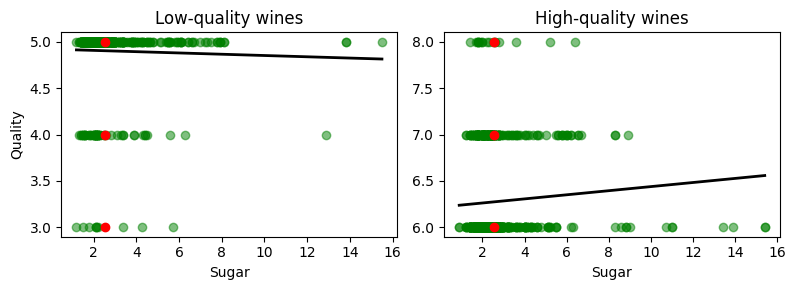

In [12]:
fig,axs = plt.subplots( 1, 2, figsize=(8,3), tight_layout=True )
for ax,i in zip(axs, [i_low, i_high]):
    ax.scatter( sugr[i], y[i], alpha=0.5, color='g' )
    plot_regression_line(ax, sugr[i], y[i], color='k', ls='-', lw=2)
[axs[0].plot(sugr[i_low].mean(), q, 'ro')  for q in [3,4,5]]
[axs[1].plot(sugr[i_high].mean(), q, 'ro')  for q in [6,7,8]]
[ax.set_xlabel('Sugar')  for ax in axs] 
axs[0].set_title('Low-quality wines')
axs[0].set_ylabel('Quality')
axs[1].set_title('High-quality wines')
plt.show()


These analyses show that the trends associated with just the means are unclear.

Let's now assemble all results into a single figure for reporting purposes:

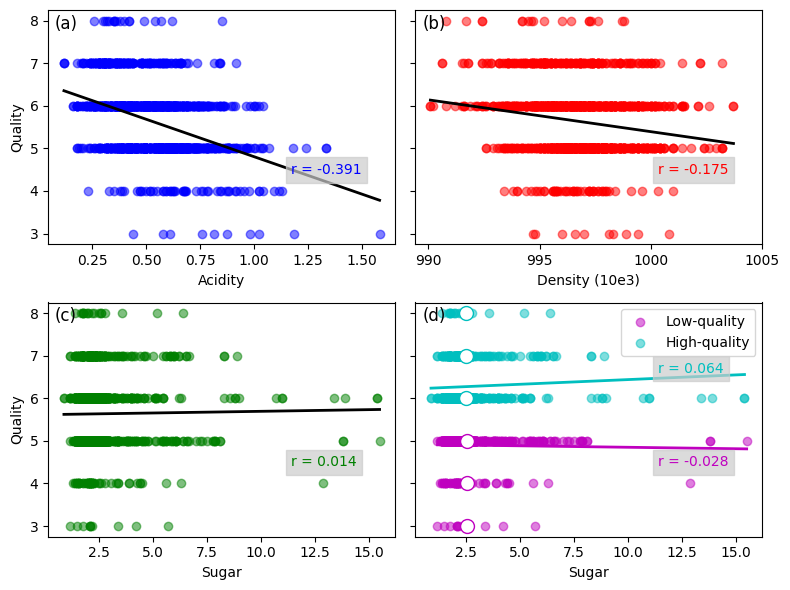

<p><span style="font-size: 1.2em;"><b>Figure 1</b>: Correlations amongst main variables.</span></p><br><br>

In [13]:
def plot_descriptive():
    
    fig,axs = plt.subplots( 2, 2, figsize=(8,6), tight_layout=True )
    ivs     = [acid, dens1, sugr]
    colors  = 'b', 'r', 'g'
    for ax,x,c in zip(axs.ravel(), ivs, colors):
        ax.scatter( x, y, alpha=0.5, color=c )
        plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
        r   = corrcoeff(x, y)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    xlabels = 'Acidity', 'Density (10e3)', 'Sugar' 
    [ax.set_xlabel(s) for ax,s in zip(axs.ravel(),xlabels)]
    axs[0,1].set_xticks([990, 995, 1000, 1005])
    [ax.set_ylabel('Quality') for ax in axs[:,0]]
    [ax.set_yticklabels([])  for ax in axs[:,1]]


    ax       = axs[1,1]
    i_low    = y <= 5
    i_high   = y > 5
    fcolors  = 'm', 'c'
    labels   = 'Low-quality', 'High-quality'
    q_groups = [[3,4,5], [6,7,8]]
    ylocs    = 0.3, 0.7
    for i,c,s,qs,yloc in zip([i_low, i_high], fcolors, labels, q_groups, ylocs):
        ax.scatter( sugr[i], y[i], alpha=0.5, color=c, facecolor=c, label=s )
        plot_regression_line(ax, sugr[i], y[i], color=c, ls='-', lw=2)
        [ax.plot(sugr[i].mean(), q, 'o', color=c, mfc='w', ms=10)  for q in qs]
        r   = corrcoeff(sugr[i], y[i])
        ax.text(0.7, yloc, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    ax.legend()
    ax.set_xlabel('Sugar')

    panel_labels = 'a', 'b', 'c', 'd'
    [ax.text(0.02, 0.92, f'({s})', size=12, transform=ax.transAxes)  for ax,s in zip(axs.ravel(), panel_labels)]
    plt.show()
    
    display_title('Correlations amongst main variables.', pref='Figure', num=1)

    
plot_descriptive()